# Description:-
In this problem bikes data is given the goal is to predict the daily level of bicycle rentals from environmental and seasonal variables using decision trees. first i arrange the data to use and then split data into training set and test data. Build a model on training set and then tested the test data and found the mean square error, number of nodes in regression tree, number of leaf nodes and finally plot the regression tree. In second part recode the months acccording to problem and again build a model on training set, tested it on test data and compared both results.

#### In this problem i used numpy, pandas, sklearn and graphviz libraries

# Importing Libraries

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz
from sklearn import tree
from sklearn import metrics 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Reading data from file

I have read data by using pandas "read_csv" module.


In [42]:
df=pd.read_csv('bikes.csv')
print(df.shape)
df.head()

(731, 12)


,date,season,year,month,holiday,weekday,workingday,weather,temp,humidity,windspeed,count
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


### Rearranging data (Delete date column)

In [43]:
feature_names=list(df.columns.values)
feature_names=feature_names[1:11]
print(feature_names)
data=df.values
print(data.shape)
data=np.delete(data,(0),axis=1)
print(data.shape)

['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weather', 'temp', 'humidity', 'windspeed']
(731, 12)
(731, 11)


### Split data into training set and test data (size of test data = 25% of whole data)

In [44]:
train_data,test_data=train_test_split(data,test_size=0.25)
print(train_data.shape,test_data.shape)

(548, 11) (183, 11)


## seperating of train_data into trainX and trainY 

In [45]:
trainX=train_data[:,0:10]
trainY=train_data[:,10]
testX=test_data[:,0:10]
testY=test_data[:,10]
print(trainX.shape,testX.shape)

(548, 10) (183, 10)


# Building model on training set
using DecisionTreeregressor

In [46]:
clf = DecisionTreeRegressor(random_state=0)
clf.fit(trainX,trainY)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

#### clf.feature_importances_  function  gives the importance of all features. Higher value means that feature have more priority

In [47]:
feature_weight=clf.feature_importances_
feature_weight

array([0.04910182, 0.28384438, 0.03282964, 0.00464661, 0.01991309,
       0.00491249, 0.0253244 , 0.46947587, 0.0742258 , 0.0357259 ])

making list of features with features weight

In [48]:
l1=[]
for i in range(0,10):
    l2=[]
    l2.append(feature_names[i])
    l2.append(feature_weight[i])
    l1.append(l2)
l1

[['season', 0.04910181728011815],
 ['year', 0.28384437924566186],
 ['month', 0.032829642853817995],
 ['holiday', 0.004646609034404934],
 ['weekday', 0.01991308519484492],
 ['workingday', 0.004912489275215726],
 ['weather', 0.025324402175443017],
 ['temp', 0.4694758739762813],
 ['humidity', 0.07422579601310204],
 ['windspeed', 0.035725904951110096]]

sorting with respect to feature weight

#### Important features in decreasing order

In [49]:
l1=sorted(l1,key=lambda x: x[1])
l1.reverse()
l1

[['temp', 0.4694758739762813],
 ['year', 0.28384437924566186],
 ['humidity', 0.07422579601310204],
 ['season', 0.04910181728011815],
 ['windspeed', 0.035725904951110096],
 ['month', 0.032829642853817995],
 ['weather', 0.025324402175443017],
 ['weekday', 0.01991308519484492],
 ['workingday', 0.004912489275215726],
 ['holiday', 0.004646609034404934]]

### number of nodes

In [50]:
n_nodes = clf.tree_.node_count
print("Number of nodes = ",n_nodes)

Number of nodes =  1095


## Calculation for number of leaf nodes

In [51]:
leaf= clf.tree_.children_left == -1
#No. of leaf nodes
ct=0
for k in leaf:
    if(k==True):
        ct+=1
print("Number of leaf nodes = ",ct)

Number of leaf nodes =  548


#### Classification of test data by using regression tree and printing the MSE

In [52]:
y_pred = clf.predict(testX)
print('Mean Squared Error:', metrics.mean_squared_error(testY, y_pred))  

Mean Squared Error: 699750.5519125683


## Plotting of regression tree

Number of nodes are :- 1095


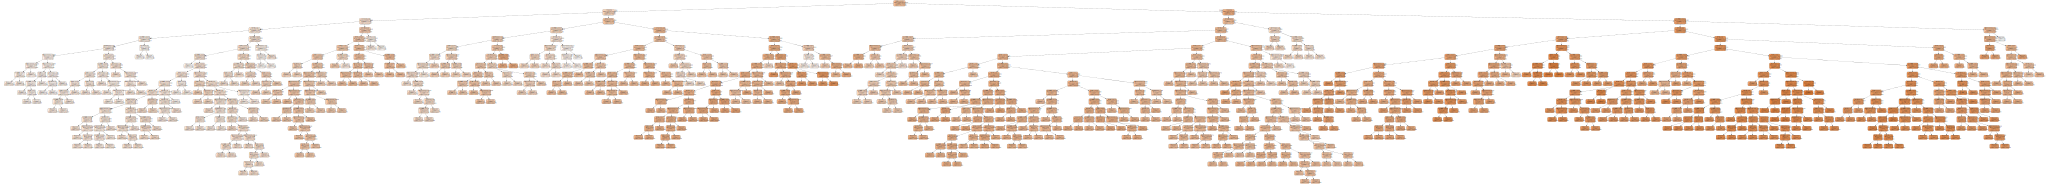

In [53]:
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=feature_names,filled=True, rounded=True,
                                special_characters=True)  
graph = graphviz.Source(dot_data)
print('Number of nodes are :-',clf.tree_.node_count)
graph


##### Into 12 different groups week days divide the data

# Second part of problem

## Recoding the months 

In [54]:
for i in range(0,len(trainX)):
    if(trainX[i,2]==1 or trainX[i,2]==2):
        trainX[i,2]=1
    elif(trainX[i,2]==3 or trainX[i,2]==4 or trainX[i,2]==11 or trainX[i,2]==12):
        trainX[i,2]=3
    else:
        trainX[i,2]=2

for i in range(0,len(testX)):
    if(testX[i,2]==1 or testX[i,2]==2):
        testX[i,2]=1
    elif(testX[i,2]==3 or testX[i,2]==4 or testX[i,2]==11 or testX[i,2]==12):
        testX[i,2]=3
    else:
        testX[i,2]=2
testX[:,2]

array([2, 2, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 3, 2, 2, 2, 3, 3, 2, 3, 1,
       1, 3, 2, 3, 2, 2, 1, 3, 2, 2, 3, 2, 2, 3, 1, 2, 2, 3, 3, 1, 2, 2,
       1, 2, 3, 1, 2, 3, 2, 3, 1, 2, 2, 1, 3, 3, 2, 3, 2, 2, 2, 3, 3, 3,
       3, 3, 1, 2, 3, 1, 1, 3, 3, 2, 3, 3, 1, 2, 3, 3, 2, 3, 2, 2, 3, 2,
       2, 2, 1, 2, 1, 2, 1, 3, 1, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 2, 2, 3,
       3, 3, 1, 3, 3, 2, 3, 3, 1, 3, 2, 2, 3, 3, 3, 2, 2, 2, 3, 2, 3, 3,
       2, 3, 2, 2, 2, 1, 2, 2, 3, 2, 1, 2, 3, 3, 2, 3, 1, 2, 2, 2, 2, 2,
       2, 2, 3, 2, 2, 2, 3, 1, 3, 1, 3, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2,
       3, 2, 1, 3, 2, 3, 3], dtype=object)

# Building model on training set
using DecisionTreeregressor

In [55]:
clf = DecisionTreeRegressor(random_state=0)
clf.fit(trainX,trainY)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

#### clf.feature_importances_  function  gives the importance of all features. Higher value means that feature have more priority

In [56]:
feature_weight=clf.feature_importances_
feature_weight

array([0.06078829, 0.28384438, 0.01307642, 0.00458542, 0.01596211,
       0.00604474, 0.01888529, 0.47930582, 0.07904815, 0.03845939])

#### Important features in decreasing order

In [57]:
l1=[]
for i in range(0,10):
    l2=[]
    l2.append(feature_names[i])
    l2.append(feature_weight[i])
    l1.append(l2)
    
l1=sorted(l1,key=lambda x: x[1])
l1.reverse()
l1

[['temp', 0.4793058249396464],
 ['year', 0.28384437924566186],
 ['humidity', 0.07904815241386957],
 ['season', 0.06078829178210268],
 ['windspeed', 0.03845938680568095],
 ['weather', 0.018885287763405957],
 ['weekday', 0.01596210924874341],
 ['month', 0.013076416289766555],
 ['workingday', 0.006044735630542162],
 ['holiday', 0.004585415880580496]]

### number of nodes

In [58]:
n_nodes = clf.tree_.node_count
print("Number of nodes = ",n_nodes)

Number of nodes =  1093


## Calculation for number of leaf nodes

In [59]:
leaf = clf.tree_.children_left == -1
#No. of leaf nodes
ct=0
for k in leaf:
    if(k==True):
        ct+=1
print("Number of leaf nodes = ",ct)

Number of leaf nodes =  547


### Classification of test data by using regression tree and printing the MSE

In [60]:
y_pred = clf.predict(testX)
print('Mean Squared Error:', metrics.mean_squared_error(testY, y_pred))  

Mean Squared Error: 682474.6284153005


# Plotting of regression tree

Number of nodes are :- 1093


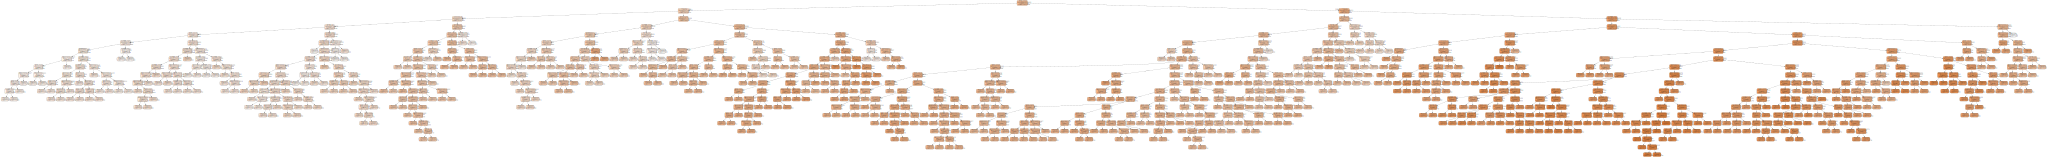

In [61]:
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=feature_names,filled=True, rounded=True,
                                special_characters=True)  
graph = graphviz.Source(dot_data)
print('Number of nodes are :-',clf.tree_.node_count)
graph
